In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime
import time
import pandas as pd
import getpass
import random
import cv2
import os
import paho.mqtt.client as mqtt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from shapely.geometry import LineString, Polygon

In [7]:
from Lamp import *
from Cloude import*
from SunAndFlower import *
from FunctionForAngles import*
%matplotlib notebook

In [2]:
def update_field(sun, cloud_list):
    global latitude, longitude, utc_offset,  hour, minute
    SEA = math.radians(getSEA(latitude, longitude, utc_offset,  hour, minute))
    AZ = math.radians(getAZ(latitude, longitude, utc_offset, hour, minute))
    minute+=1
    sun.update_position(SEA, AZ)
    [x.move() for x in cloude_list]


In [3]:
#Алгоритм поиска точки пересечения
def intersection(Segment, Plane):
    P0, P1     = np.array(Segment.coords)
    Q0, Q1, Q2 = np.array(Plane.exterior)[:-1]   

    #Вектора на плоскости
    vector_plane_1 = Q1 - Q0
    vector_plane_2 = Q2 - Q0

    #Вектор нормали
    n  = np.cross(vector_plane_1, vector_plane_2)/np.linalg.norm(np.cross(vector_plane_1, vector_plane_2))
    u = P1 - P0 
    w = P0 - Q0 
    #Проверка на параллельность
    if np.dot(n, u) != 0:
        Si = np.dot(-n, w) / np.dot(n, u)
        intersection = P0 + Si * u
        return intersection
    else:
        return None
def check_intersection(sun, cloude, flower):
    l = LineString([flower.position(),sun.position()])#Вектор от солнца к цветку
    p = Polygon(cloude.position()[0:3])#полигон точек, задающих облако
    c= intersection(l, p)#Точка пересечения облака и солнца
    if c is not None:
        if (cloude.get_x()[2]<= c[0]<= cloude.get_x()[0] and cloude.get_y()[1] <= c[1] <= cloude.get_y()[0] ):
            return True
    return False

In [4]:
#Рисовалка и гифка
def drow(sun,cloude_list, flower, t, x_sight, y_sight , z_sight):
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    ax.tick_params(axis='x', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='b', labelcolor='g',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    ax.tick_params(axis='y', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='red',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    ax.plot([flower.position()[0],sun.position()[0]],
            [flower.position()[1],sun.position()[1]], 
            [flower.position()[2],sun.position()[2]], color = "y")
    for i in range(len(cloude_list)):
        x = cloude_list[i].get_x()
        y = cloude_list[i].get_y()
        z = cloude_list[i].get_z() 
        ax.plot_trisurf(x,y,z, cmap = cm.jet)
    ax.set_xlim(-x_sight,x_sight)
    ax.set_ylim(-y_sight,y_sight)
    ax.set_zlim(0,z_sight)
    ax.view_init(42, -55)
    plt.xlabel('X')
    plt.ylabel('Y')
    fig.savefig(f'Гифка/GIF{t}.png')
    plt.show()
def gif(number_of_iter):
    os.chdir('C:/Users/Snowfall/Desktop/МАИ/Архитектура информационных систем/ПЗ1/Гифка')
    imgs = [cv2.imread(f"GIF{t}.png") for t in range(number_of_iter)]
    height, width, layers = imgs[0].shape
    video = cv2.VideoWriter(r'gif.mp4',-1,1,(width,height))
    _ = [video.write(i) for i in imgs]
    cv2.destroyAllWindows()
    video.release()

Введите широту(Москва - 55.7522): 
Введите долготу(Москва - 37.6156): 
Введите временной сдвиг(Москва - 3 часа): 
Введите время в часах: 11
Введите время в минутах: 15


<IPython.core.display.Javascript object>


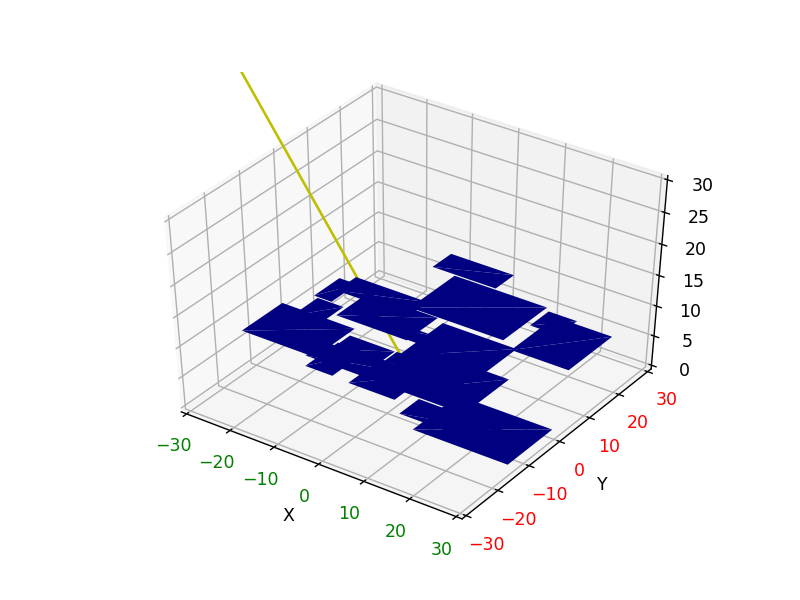

Коордитаны солнца: [-83.62670859  37.29965714  40.19090927]


<IPython.core.display.Javascript object>


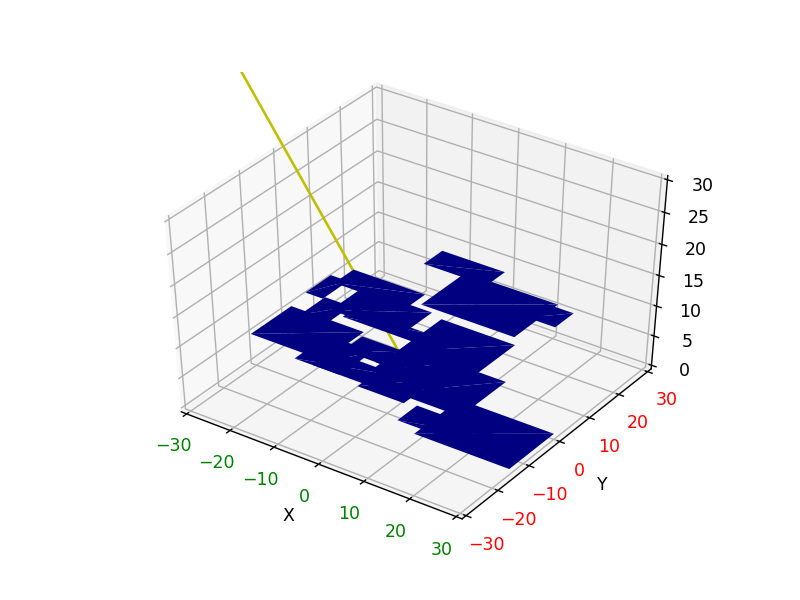

Коордитаны солнца: [-83.7600043   36.89918305  40.28289922]


<IPython.core.display.Javascript object>


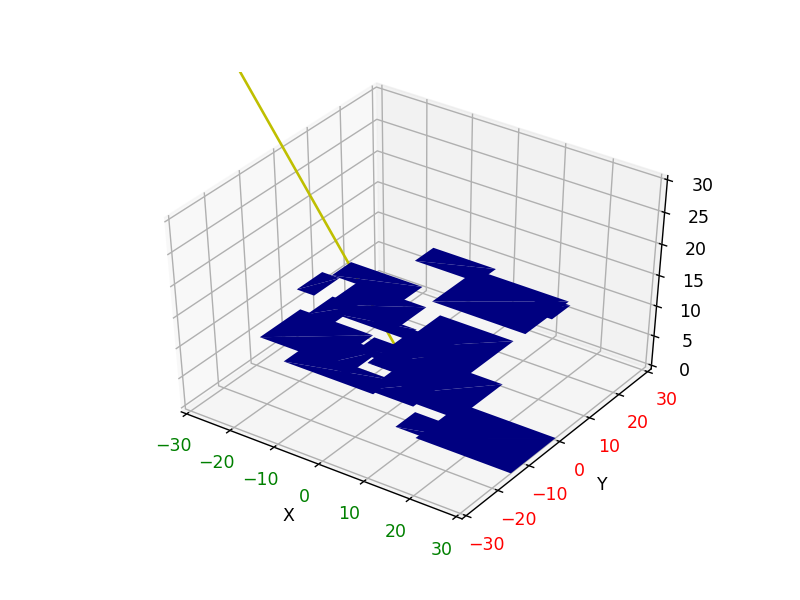

Коордитаны солнца: [-83.89185773  36.49800575  40.37389977]


<IPython.core.display.Javascript object>


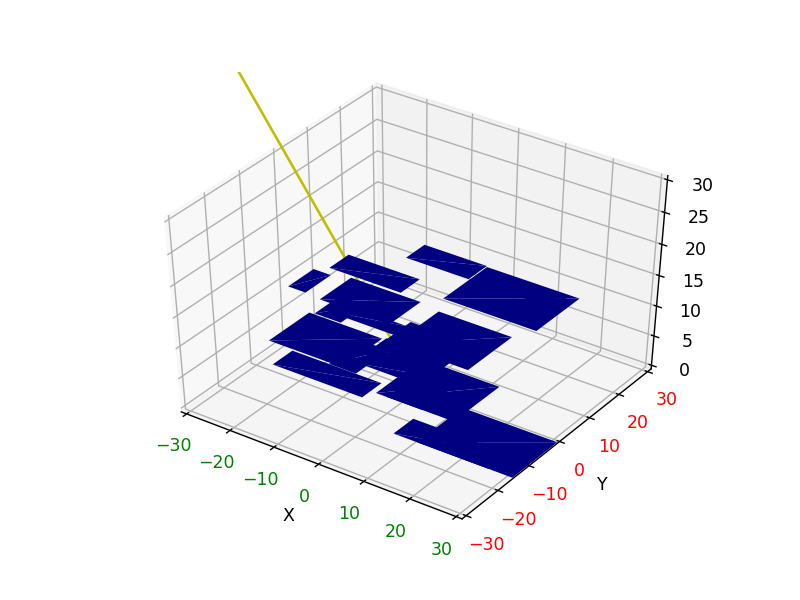

Коордитаны солнца: [-84.02226635  36.0961329   40.46390918]


<IPython.core.display.Javascript object>


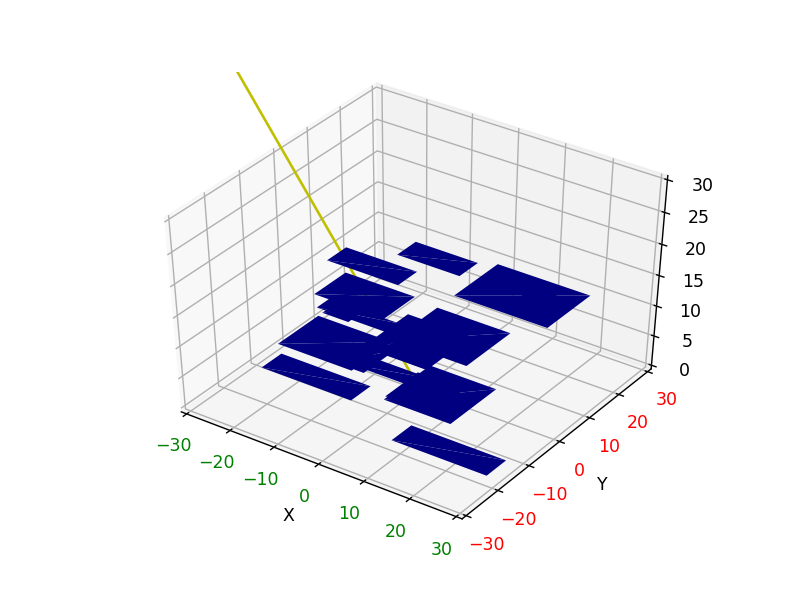

Коордитаны солнца: [-84.15122768  35.69357214  40.55292576]


<IPython.core.display.Javascript object>


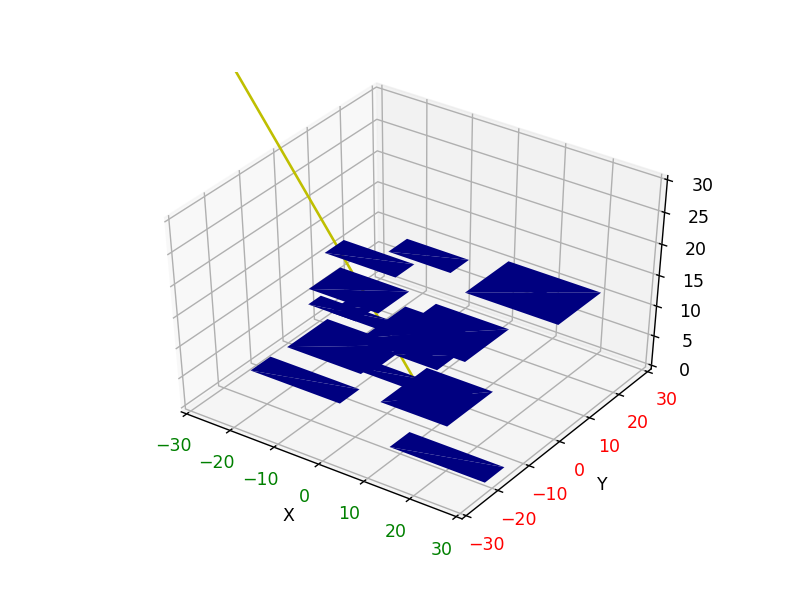

Коордитаны солнца: [-84.27873924  35.29033114  40.64094781]


<IPython.core.display.Javascript object>


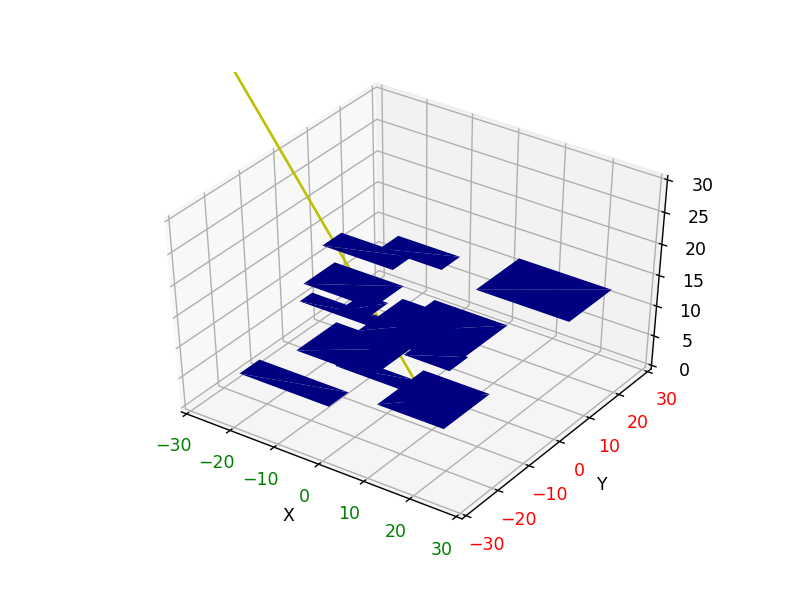

Коордитаны солнца: [-84.40479862  34.88641758  40.72797367]


<IPython.core.display.Javascript object>


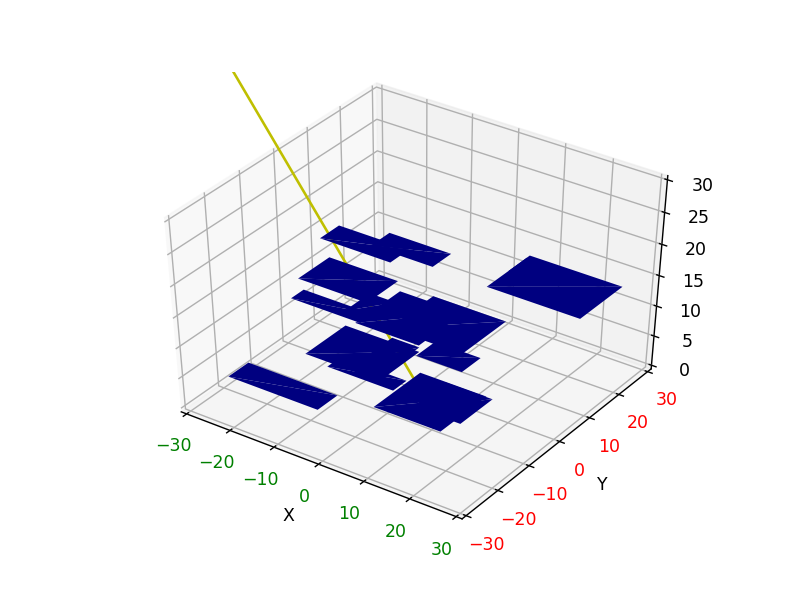

Коордитаны солнца: [-84.52940339  34.48183915  40.81400167]


<IPython.core.display.Javascript object>


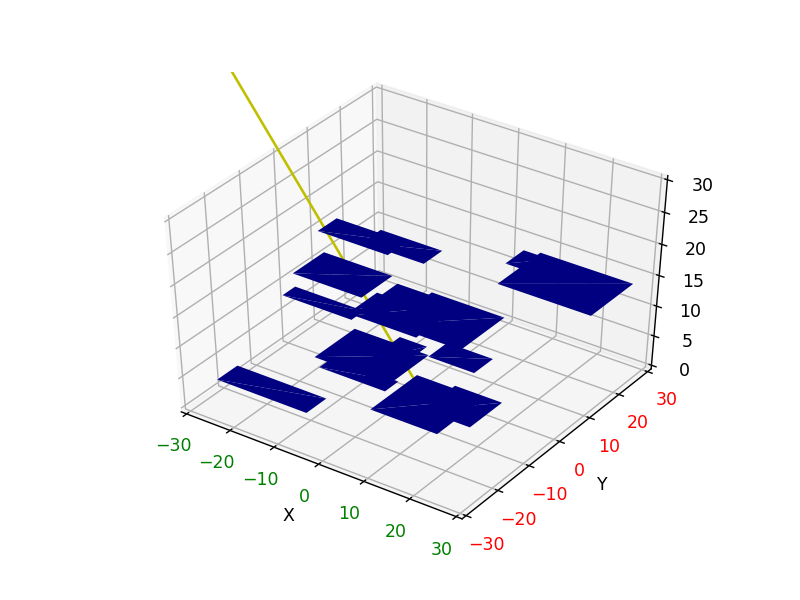

Коордитаны солнца: [-84.65255117  34.07660354  40.89903019]


<IPython.core.display.Javascript object>


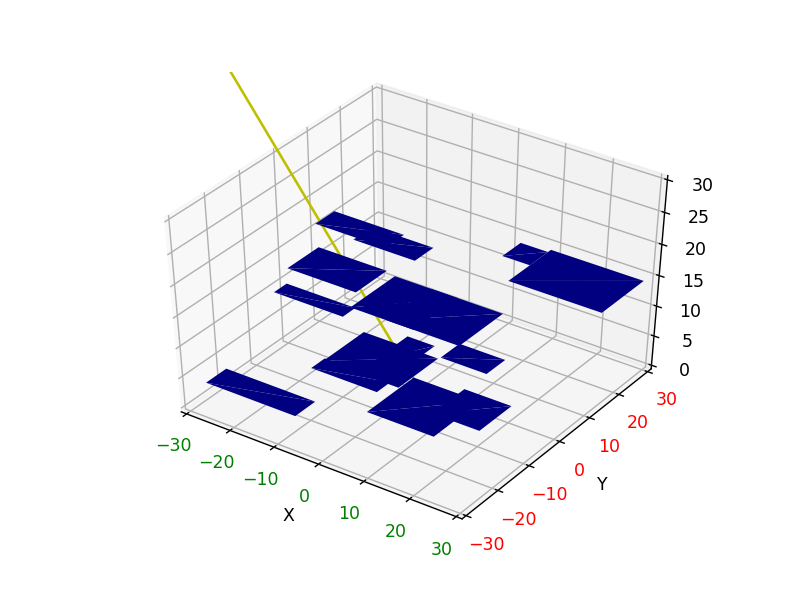

Коордитаны солнца: [-84.77423963  33.67071848  40.98305762]


,Время с начала запуска,Состояние системы
0,1,ON
1,2,ON
2,3,ON
3,4,ON
4,5,ON
5,6,OFF
6,7,ON
7,8,ON
8,9,OFF
9,10,OFF


In [10]:
date = datetime.datetime.now().timetuple()
os.chdir('C:/Users/Snowfall/Desktop/МАИ/Архитектура информационных систем/ПЗ1')
try:
    latitude = float(input("Введите широту(Москва - 55.7522): "))
except ValueError:
    latitude = 55.55
try:
    longitude = float(input("Введите долготу(Москва - 37.6156): "))
except ValueError:
    longitude = 37.37
try: 
    utc_offset = int(input("Введите временной сдвиг(Москва - 3 часа): "))
except ValueError:
    utc_offset = 3
try:
    hour = int(input("Введите время в часах: "))
except ValueError:
    hour = date[3]
try:
    minute = int(input("Введите время в минутах: "))
except ValueError:
    minute = date[4]
SEA = math.radians(getSEA(latitude, longitude, utc_offset, hour, minute))
AZ = math.radians(getAZ(latitude, longitude, utc_offset, hour, minute))
sun = Sun(SEA, AZ)
count_of_cloude = 20
cloude_list = list()
for _ in range(count_of_cloude):
    cloude = Cloude()
    cloude_list.append(cloude)
flower = Flower()
broker_address="hairdresser.cloudmqtt.com"#"test.mosquitto.org"
topic = "immortal_flower"#"lampandflower"
lamp = Lamp(broker_address, topic)
time_on = list()
status = list()
x_sight = 30
y_sight = 30
z_sight = 30
number_of_iter = 10
for t in range(number_of_iter):
    time_on.append(t+1)
    if sun.get_z()<0 :
        lamp.on()
    else:
        list_intersection = [check_intersection(sun,cloude_list[i],flower) for i in range(len(cloude_list))] 
        if True in list_intersection:
            lamp.on()
        else:
            lamp.off()
    cloude_list = [cloude for cloude in cloude_list if cloude.check_out_of_sight(x_sight, y_sight)==False]
    status.append(lamp.check())
    drow(sun,cloude_list, flower, t, x_sight, y_sight, z_sight)
    update_field(sun, cloude_list)
    print("Коордитаны солнца: {}".format(sun.position()))  
    time.sleep(1)
df = pd.DataFrame({'Время с начала запуска': time_on, 'Состояние системы': status})
if(getpass.getuser() == "Snowfall"):
    df.to_excel('Отчет о работе ламы - 3D.xlsx')
else:
    df.to_excel('Desktop/Отчет о работе ламы - 3D.xlsx')
gif(number_of_iter)
df.head(10)